<a href="https://colab.research.google.com/github/pabloalima81/tcc1/blob/master/cfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas


In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import nltk


Define a versão do tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# Pré-processamendo dos dados

Monta o Drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nomeia as colunas

In [ ]:
cols = ['label', 'preprocessed_news']

Carrega a base de dados

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cfn/Data/pre-processed.csv', header = None,
                         names = cols, engine = 'python', encoding = 'utf-8')
data.shape


(7200, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


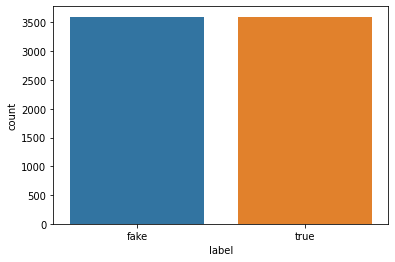

In [ ]:
sns.countplot(data.label);

In [ ]:
data.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [ ]:
data.tail()

,label,preprocessed_news
7195,true,jornal britanico acao contra lula lava jato se...
7196,true,temer diz acionou pf cade investigar aumentos ...
7197,true,obstaculos politicos temer especialistas ouvid...
7198,true,setembro boa noite aqui estao principais notic...
7199,true,envolvo politica diz brasileiro preso venezuel...


Coloca os previsores(noticias) em X

In [ ]:
X = data.iloc[:, 1].values
X

array(['katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma',
       'ray peita bolsonaro conservador fake entrevista danilo gentili divide direita site vem avisando jair bolsonaro deveria abandonar pauta estatista vez fazer discurso convincente boa parte liberais conservadores brasil querem ver livres amarras estatais tudo bem pesquisas ainda dizem maior 

Coloca os classificadores(true or fake) em y

In [ ]:
y = data.iloc[:, 0].values
y

array(['fake', 'fake', 'fake', ..., 'true', 'true', 'true'], dtype=object)

Separa a base em treino e teste. Stratify = y deixa um numero igual de registro para as dias classes

In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.70, stratify = y)

In [ ]:
X.shape

(2160,)

In [ ]:
data.label.unique()

array(['fake', 'true'], dtype=object)

Verifica o numero de registros em cada classe

In [ ]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array(['fake', 'true'], dtype=object), array([1080, 1080]))

Converte os valores das classes em zero e um

In [ ]:
data_labels = y

In [ ]:
data_labels[data_labels == 'true'] = 1
data_labels[data_labels == 'fake'] = 0
data_labels

array([1, 0, 1, ..., 1, 1, 0], dtype=object)

In [ ]:
np.unique(data_labels)

array([0, 1], dtype=object)

# Tokenização

In [ ]:
import math
math.pow(2, 16)

65536.0

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(X, target_vocab_size=2**16)

In [ ]:
tokenizer.vocab_size

49365

In [ ]:
print (tokenizer.subwords)

['nao_', 'lula_', 'sao_', 'presidente_', 'tambem_', 'ser_', 'disse_', 'anos_', 'sobre_', 'ja_', 'federal_', 'governo_', 'ainda_', 'brasil_', 'r_', 'segundo_', 'temer_', 'ate_', 'pais_', 'ha_', 'diz_', 'ter_', 'contra_', 'vai_', 'pessoas_', 'dia_', 'pode_', 'ano_', 'afirmou_', 'apos_', 'justica_', 'ministro_', 'milhoes_', 'caso_', 'porque_', 'acordo_', 'policia_', 'dois_', 'dilma_', 'estado_', 'publico_', 'lava_', 'paulo_', 'estao_', 'jato_', 'so_', 'dinheiro_', 'defesa_', 'fazer_', 'ministerio_', 'todos_', 'casa_', 'hoje_', 'durante_', 'processo_', 'rio_', 'mil_', 'odebrecht_', 'decisao_', 'voce_', 'parte_', 'outros_', 'alem_', 'nesta_', 'republica_', 'sera_', 'tribunal_', 'politica_', 'onde_', 'prisao_', 'operacao_', 'stf_', 'pt_', 'juiz_', 'qualquer_', 'agora_', 'corrupcao_', 'camara_', 'vez_', 'moro_', 'desde_', 'empresa_', 'seguranca_', 'grupo_', 'nacional_', 'grande_', 'entao_', 'apenas_', 'mundo_', 'deputado_', 'maior_', 'coreia_', 'tres_', 'dias_', 'norte_', 'momento_', 'tudo_',

In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in X]

In [ ]:
for _ in range(20):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[1675, 10356, 2, 73, 3, 41687, 947, 2468, 4095, 131, 414, 41177, 1675, 27403, 247, 2, 374, 113, 260, 180, 1064, 341, 1366, 10260, 4024, 10212, 850, 10, 332, 377, 467, 4387, 73, 68, 240, 1675, 212, 3265, 758, 577, 9170, 3265, 3195, 3265, 655, 3265, 8010, 5230, 2033, 1675, 10260, 2, 14286, 908, 23704, 2981, 26300, 2, 12710, 79, 192, 5843, 312, 1830, 16531, 14, 1363, 22097]
[716, 2311, 24851, 24781, 1791, 2811, 54, 8309, 16, 248, 45, 6340, 2311, 12530, 24851, 24781, 929, 34579]
[8142, 7826, 70, 197, 202, 40562]
[6849, 1363, 1614, 3784, 4353, 28, 152, 625, 12421, 747, 1833, 10283, 3695, 8289, 18, 18349, 13442, 276, 1740, 44, 378, 479, 28, 2782, 1614, 16708, 152, 625, 163, 973, 747, 11336, 973, 16623, 6, 17416, 3201, 10376, 18, 141, 1254, 304, 21962, 477, 49, 18349, 13442, 5, 443, 2125, 7292, 298, 596, 11363, 1513, 2395, 52, 542, 19870, 30, 8499, 15, 33, 125, 1363, 378, 1614, 3784, 28, 163, 539, 236, 28, 1178, 2595, 12421, 8194, 3439, 23182, 15475, 31679, 3954, 8111, 31678, 494, 215, 4700, 

# Padding
Preenche as sentenças deixando todas com mesmo tamanho

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

4164

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value = 0, padding = 'post', maxlen=max_len)

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[9740  950 1393 ...    0    0    0]
[1536    2   21 ...    0    0    0]
[24049 40353 15242 ...     0     0     0]
[ 2030 25751   173 ...     0     0     0]
[  346  3107 14843 ...     0     0     0]
[  17 5469  219 ...    0    0    0]
[ 303 5165   72 ...    0    0    0]
[ 1974  1984 17914 ...     0     0     0]
[ 472 1112 1027 ...    0    0    0]
[ 282   24 1127 ...    0    0    0]


# Divisao da Base de dados

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [ ]:
train_inputs.shape

(1512, 4164)

In [ ]:
train_labels.shape

(1512,)

In [ ]:
test_inputs.shape

(648, 4164)

In [ ]:
test_labels.shape

(648,)

# Model

In [ ]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Treinamento

## Parâmetros

In [ ]:
vocab_size = tokenizer.vocab_size
vocab_size

49365

In [ ]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [ ]:
dropout_rate = 0.2
nb_epochs = 3

## Treino

In [ ]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [ ]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Salva a rede treinada ou restaura última versão salva

In [ ]:
checkpoint_path = "./content/drive/My Drive/Colab Notebooks/cfn"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored')

Latest checkpoint restored


In [ ]:
train_inputs=train_inputs.astype(np.int64)
train_labels=train_labels.astype(np.int64)
test_inputs=test_inputs.astype(np.int64)
test_labels=test_labels.astype(np.int64)

In [ ]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
ckpt_manager.save()

Epoch 1/3
22/22 [==============================] - 151s 7s/step - loss: 0.6520 - accuracy: 0.5882 - val_loss: 0.5459 - val_accuracy: 0.7632
Epoch 2/3
22/22 [==============================] - 155s 7s/step - loss: 0.3201 - accuracy: 0.9603 - val_loss: 0.1303 - val_accuracy: 0.9868
Epoch 3/3
22/22 [==============================] - 153s 7s/step - loss: 0.0595 - accuracy: 0.9868 - val_loss: 0.0532 - val_accuracy: 0.9868


'./content/drive/My Drive/Colab Notebooks/cfn/ckpt-3'

# Avaliação

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

11/11 [==============================] - 19s 2s/step - loss: 0.1224 - accuracy: 0.9568
[0.12241677939891815, 0.9567901492118835]


In [ ]:
y_pred_test = Dcnn.predict(test_inputs)


In [ ]:
y_pred_test

array([[0.14265144],
       [0.04252544],
       [0.00259718],
       [0.00327039],
       [0.00190958],
       [0.16495022],
       [0.15837842],
       [0.01393196],
       [0.99985445],
       [0.00183171],
       [0.9969985 ],
       [0.00661063],
       [0.0021801 ],
       [0.96489286],
       [0.00386319],
       [0.16022116],
       [0.9980719 ],
       [0.00332201],
       [0.00776637],
       [0.999208  ],
       [0.03389999],
       [0.0335739 ],
       [0.99598867],
       [0.04058135],
       [0.9721552 ],
       [0.15160373],
       [0.00327986],
       [0.00321895],
       [0.18655586],
       [0.25385314],
       [0.9547607 ],
       [0.9961729 ],
       [0.05160233],
       [0.4854027 ],
       [0.9994589 ],
       [0.00233063],
       [0.00471833],
       [0.99760354],
       [0.00690287],
       [0.999534  ],
       [0.9954202 ],
       [0.9957092 ],
       [0.99724233],
       [0.00242347],
       [0.9694121 ],
       [0.00159699],
       [0.9825145 ],
       [0.923

In [ ]:
y_pred_test = (y_pred_test > 0.5)

In [ ]:
y_pred_test

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[315,   9],
       [ 19, 305]])

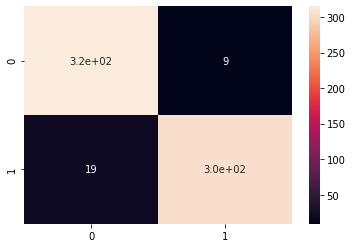

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

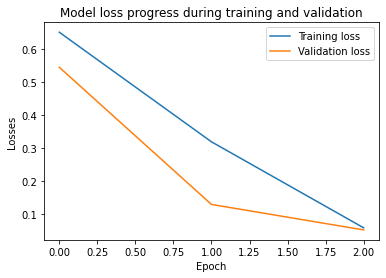

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

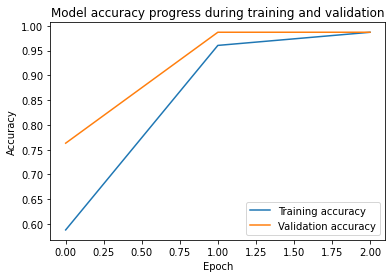

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

# Previsões

In [51]:
text = 'To com esse@ video// aqui de uma âRMAcaoO +CRUEL E DESUMANA que fizeram hoje com o candidato dada na sede do'
text = clean_text(clean_sw(text))
text

'to com esse video aqui de uma rmacaoo cruel e desumana que fizeram hoje com o candidato dada na sede do'

In [ ]:
Dcnn(np.array([text]), training=False).numpy()

array([[0.4746826]], dtype=float32)

# Limpeza dos dados

## Remove Caracteres especiais

In [30]:
def clean_text(text):
  text = BeautifulSoup(text, 'lxml').get_text()
  text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
  text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
  text = re.sub(r"[^a-zA-Z.!?]", ' ', text)
  text = re.sub(r" +", ' ', text)
  return text

## Remove Stop Words

In [ ]:
!python -m spacy download pt

In [37]:
nlp = sp.load('pt')
nlp

In [46]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def clean_sw(text):
  text = text.lower()
  document = nlp(text)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stopwords and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return text